In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('preprocessed_data.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   monthly_rent        1821 non-null   float64
 1   monthly_aconto      1821 non-null   float64
 2   housing_type        1821 non-null   object 
 3   size_sqm            1821 non-null   float64
 4   rooms               1821 non-null   int64  
 5   floor               1821 non-null   int64  
 6   furnished           1821 non-null   object 
 7   roommate_friendly   1821 non-null   object 
 8   pets_allowed        1821 non-null   object 
 9   elevator            1821 non-null   object 
 10  senior_friendly     1821 non-null   object 
 11  students_only       1821 non-null   object 
 12  balcony_terrace     1821 non-null   object 
 13  parking             1821 non-null   object 
 14  dishwasher          1821 non-null   object 
 15  washing_machine     1821 non-null   object 
 16  chargi

In [59]:
df['energy_mark'].value_counts()

energy_mark
none    836
A15     243
A20     231
C       208
D       113
A10      82
B        68
E        29
F         8
G         3
Name: count, dtype: int64

In [60]:
df[df.select_dtypes(include=['object']).columns.tolist()].columns

Index(['housing_type', 'furnished', 'roommate_friendly', 'pets_allowed',
       'elevator', 'senior_friendly', 'students_only', 'balcony_terrace',
       'parking', 'dishwasher', 'washing_machine', 'charging_station', 'dryer',
       'energy_mark', 'area', 'availability_in', 'months_on_website'],
      dtype='object')

### First Attempt of Summary Statistics

In [61]:
from scipy import stats
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['monthly_rent']))

# Set a threshold (commonly 3)
threshold = 3

# Identify outliers
df[z_scores > threshold]

,monthly_rent,monthly_aconto,housing_type,size_sqm,rooms,floor,furnished,roommate_friendly,pets_allowed,elevator,...,charging_station,dryer,deposit,prepaid_rent,energy_mark,area,availability_in,days_on_website,total_monthly_rent,months_on_website
177,1608750.0,500.0,Lejlighed,117.0,3,3,Nej,Nej,Nej,Nej,...,Ja,Ikke angivet,4826250.0,1608750.0,C,København NV,<1 month,13.0,1609250.0,<1 month
243,1276474.0,1260.0,Lejlighed,104.0,4,2,Nej,Nej,Ja,Ja,...,Ikke angivet,Ikke angivet,3829422.0,1276474.0,A20,Hedehusene,1-3 months,14.0,1277734.0,<1 month
292,1758802.0,1500.0,Lejlighed,120.0,4,0,Ja,Ja,Nej,Ja,...,Ikke angivet,Ja,1758802.0,0.0,A20,København S,3+ months,15.0,1760302.0,<1 month
296,1374167.0,1050.0,Lejlighed,97.0,3,4,Nej,Nej,Nej,Ikke angivet,...,Ikke angivet,Ikke angivet,41225.0,41225.0,C,Valby,<1 month,15.0,1375217.0,<1 month
331,1206118.0,1270.0,Lejlighed,105.0,4,0,Nej,Nej,Ja,Ja,...,Ikke angivet,Ikke angivet,3618354.0,1206118.0,A20,Hedehusene,3+ months,15.0,1207388.0,<1 month
397,798258.0,752.0,Lejlighed,108.0,5,3,Ja,Nej,Nej,Nej,...,Ja,Ja,20000.0,798258.0,none,Søborg,1-3 months,18.0,799010.0,<1 month
520,1496250.0,1100.0,Lejlighed,98.0,4,1,Nej,Nej,Nej,Ja,...,Ja,Ja,4488750.0,1496250.0,none,Valby,3+ months,21.0,1497350.0,<1 month
523,1496250.0,1100.0,Lejlighed,94.0,4,1,Nej,Nej,Nej,Ja,...,Ja,Ja,4488750.0,1496250.0,none,Valby,3+ months,21.0,1497350.0,<1 month
525,1496250.0,1100.0,Lejlighed,94.0,4,0,Nej,Nej,Nej,Ja,...,Ja,Ja,4488750.0,1496250.0,none,Valby,3+ months,21.0,1497350.0,<1 month
527,1496250.0,1100.0,Lejlighed,94.0,4,1,Nej,Nej,Nej,Ja,...,Ja,Ja,4488750.0,1496250.0,none,Valby,3+ months,21.0,1497350.0,<1 month


In [62]:
z_scores = np.abs(stats.zscore(df['monthly_aconto']))

# Set a threshold (commonly 3)
threshold = 3

# Identify outliers
df[z_scores > threshold]

,monthly_rent,monthly_aconto,housing_type,size_sqm,rooms,floor,furnished,roommate_friendly,pets_allowed,elevator,...,charging_station,dryer,deposit,prepaid_rent,energy_mark,area,availability_in,days_on_website,total_monthly_rent,months_on_website
77,25000.0,2500.0,Lejlighed,160.0,7,2,Nej,Ja,Nej,Nej,...,Ikke angivet,Ja,75000.0,0.0,D,Valby,<1 month,11.0,27500.0,<1 month
365,18500.0,2300.0,Lejlighed,93.0,3,0,Nej,Nej,Nej,Nej,...,Ikke angivet,Ja,37000.0,18500.0,none,Vedbæk,<1 month,17.0,20800.0,<1 month
584,25100.0,2440.0,Lejlighed,108.0,3,2,Nej,Nej,Nej,Ja,...,Nej,Nej,75300.0,25100.0,none,Hellerup,3+ months,22.0,27540.0,<1 month
641,14800.0,2500.0,Lejlighed,140.0,5,2,Nej,Nej,Nej,Nej,...,Ja,Ikke angivet,44400.0,44400.0,D,Glostrup,<1 month,26.0,17300.0,<1 month
643,65000.0,2500.0,Lejlighed,253.0,6,1,Ja,Nej,Nej,Ja,...,Ikke angivet,Ja,180000.0,65000.0,C,København Ø,<1 month,26.0,67500.0,<1 month
711,22100.0,3099.0,Lejlighed,146.0,5,0,Nej,Ja,Ja,Nej,...,Ikke angivet,Ja,66300.0,0.0,C,Valby,3+ months,28.0,25199.0,<1 month
769,23925.0,2500.0,Lejlighed,174.0,6,1,Nej,Nej,Nej,Nej,...,Ikke angivet,Nej,71775.0,47850.0,D,Frederiksberg,<1 month,29.0,26425.0,<1 month
832,39500.0,2500.0,Lejlighed,250.0,7,4,Ja,Ja,Ja,Ja,...,Ja,Ja,118500.0,0.0,C,Hellerup,<1 month,34.0,42000.0,1-3 months
1080,46500.0,2750.0,Lejlighed,300.0,8,3,Nej,Nej,Nej,Nej,...,Ikke angivet,Ikke angivet,139500.0,0.0,none,København K,3+ months,47.0,49250.0,1-3 months
1157,22000.0,2800.0,Lejlighed,120.0,4,0,Nej,Nej,Nej,Nej,...,Ikke angivet,Ja,44000.0,22000.0,D,Gentofte,<1 month,53.0,24800.0,1-3 months


In [63]:
# 1. Quick Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       monthly_rent  monthly_aconto     size_sqm        rooms        floor  \
count  1.821000e+03     1821.000000  1821.000000  1821.000000  1821.000000   
mean   2.408824e+04      798.379462    74.945085     2.535969     2.322900   
std    1.244774e+05      491.094945    40.110661     1.211414     2.365519   
min    3.127000e+03        0.000000     6.000000     1.000000     0.000000   
25%    9.600000e+03      500.000000    42.000000     1.000000     1.000000   
50%    1.230000e+04      800.000000    79.000000     3.000000     2.000000   
75%    1.520000e+04     1000.000000    98.000000     3.000000     3.000000   
max    1.758802e+06     3099.000000   324.000000     8.000000    27.000000   

            deposit  prepaid_rent  days_on_website  total_monthly_rent  
count  1.821000e+03  1.821000e+03      1821.000000        1.821000e+03  
mean   6.311357e+04  2.343146e+04        64.157057        2.488662e+04  
std    3.382125e+05  1.403508e+05        94.682967        

In [64]:
continuous_vars = df.select_dtypes(include=['number']).columns.tolist()
continuous_ratio_vars = df.select_dtypes(include=['float64']).columns.tolist()

In [65]:
# 2. Correlation Matrix for the numerical variables
correlation_matrix = df[continuous_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    monthly_rent  monthly_aconto  size_sqm     rooms  \
monthly_rent            1.000000        0.075064  0.108682  0.117952   
monthly_aconto          0.075064        1.000000  0.690344  0.612423   
size_sqm                0.108682        0.690344  1.000000  0.871846   
rooms                   0.117952        0.612423  0.871846  1.000000   
floor                  -0.022950        0.047057  0.066243  0.029116   
deposit                 0.929467        0.077898  0.109430  0.114431   
prepaid_rent            0.830121        0.071276  0.104133  0.097145   
days_on_website        -0.036344       -0.056904 -0.023001 -0.040398   
total_monthly_rent      0.999992        0.078985  0.111372  0.120331   

                       floor   deposit  prepaid_rent  days_on_website  \
monthly_rent       -0.022950  0.929467      0.830121        -0.036344   
monthly_aconto      0.047057  0.077898      0.071276        -0.056904   
size_sqm            0.066243  0.109430 

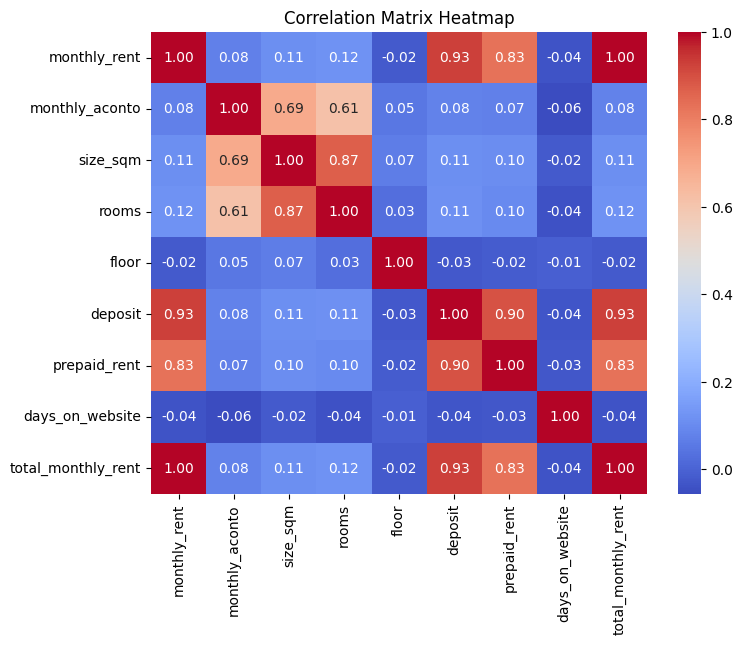

In [66]:
# 3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [67]:
len(df[df['monthly_aconto']==0])/len(df)*100

14.387699066447007

In [68]:
np.max(df['monthly_aconto'])

np.float64(3099.0)

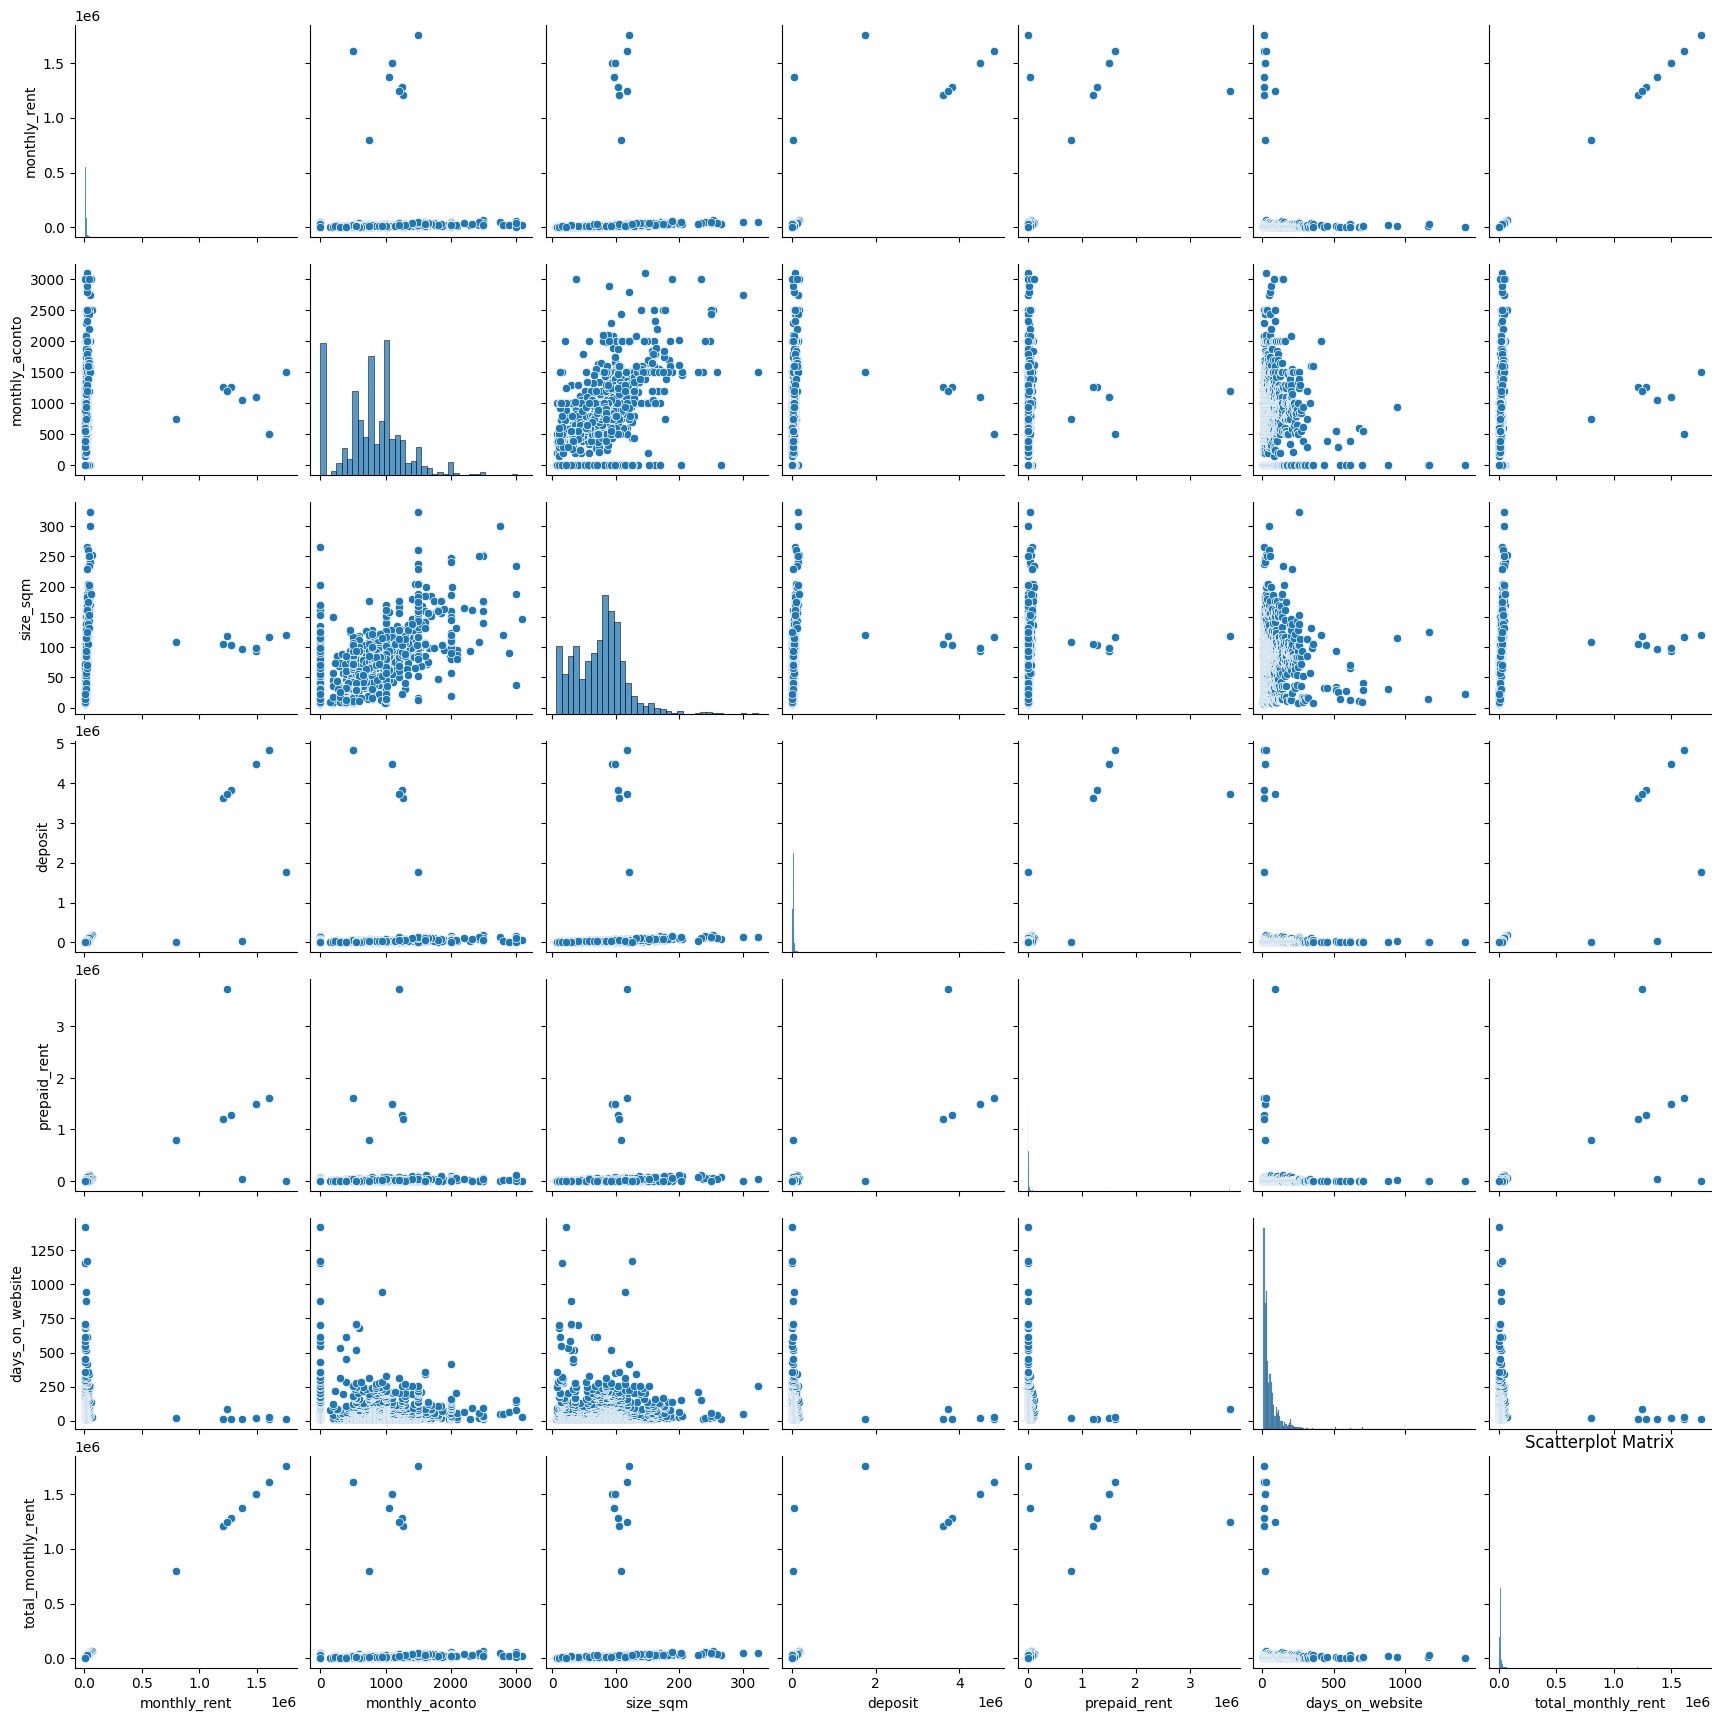

In [69]:
# 4. Scatterplot Matrix with Histograms (only continuous ratio variables)
sns.pairplot(df[df.select_dtypes(include=['float64']).columns.tolist()])
plt.title('Scatterplot Matrix')
plt.show()

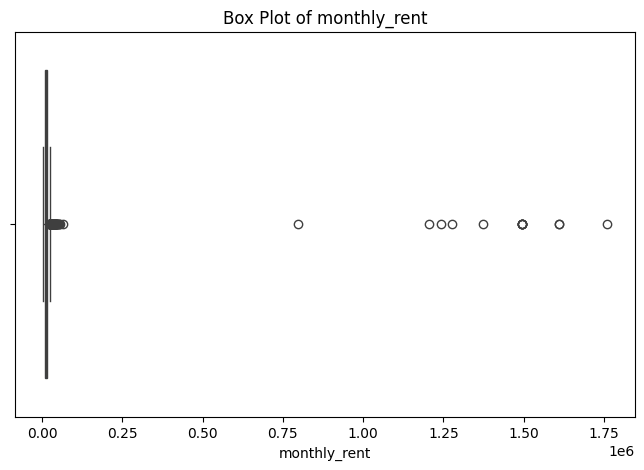

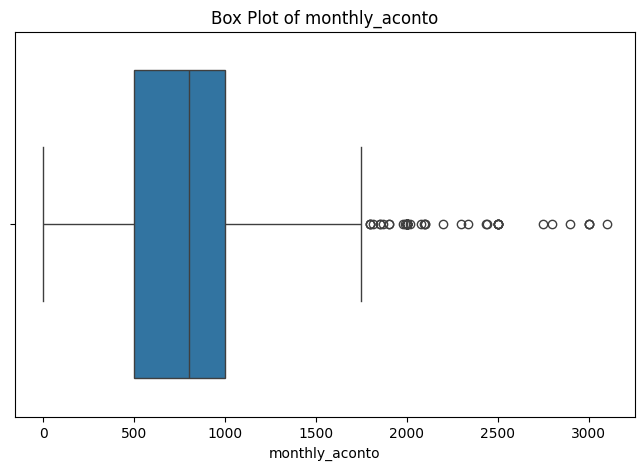

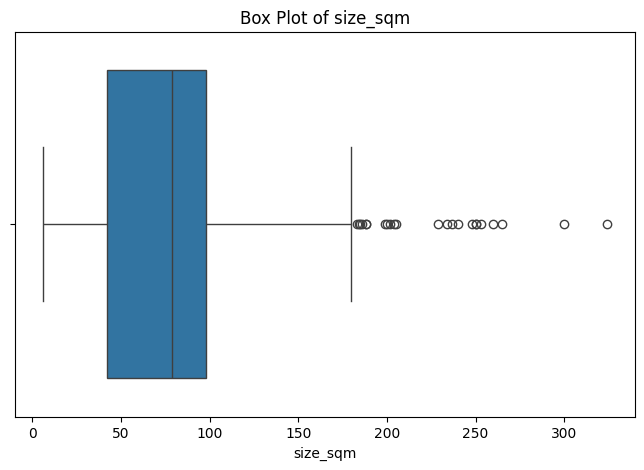

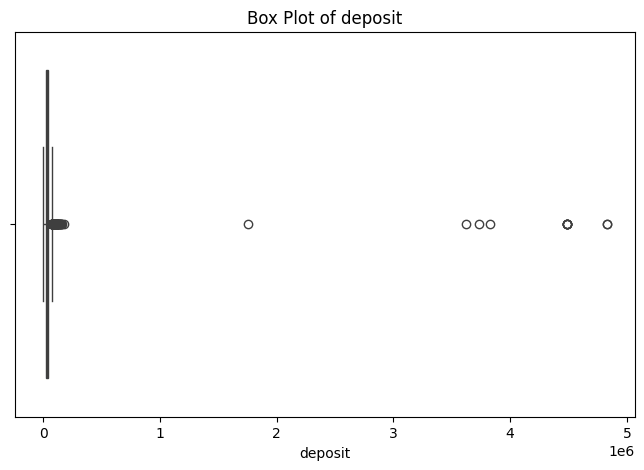

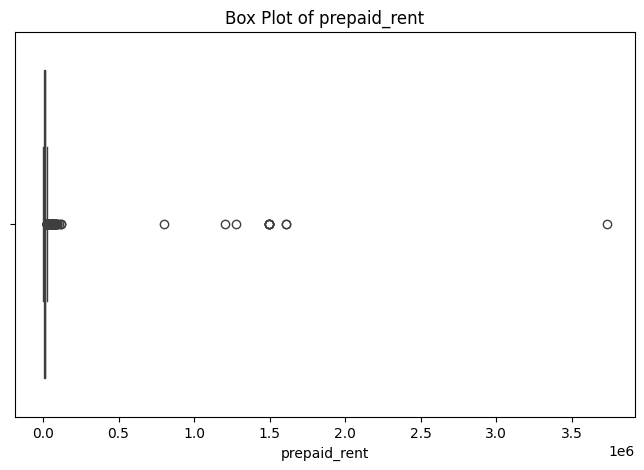

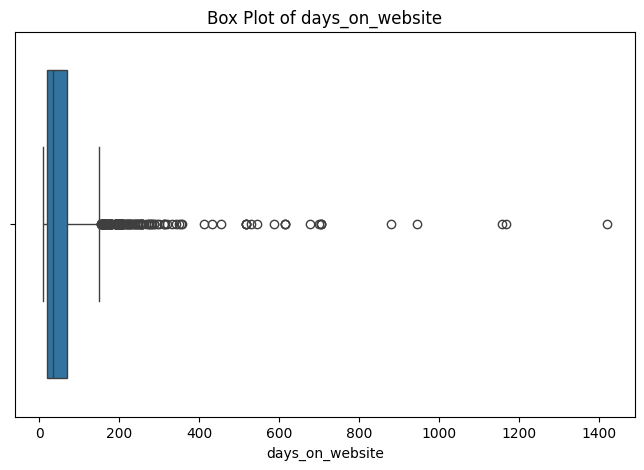

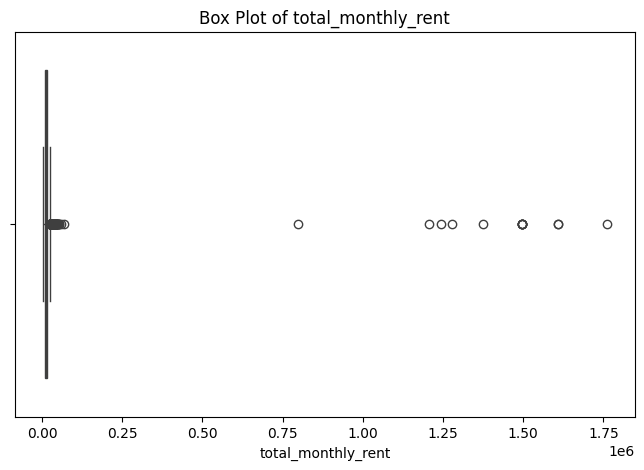

In [70]:
for var in df.select_dtypes(include=['float64']).columns.tolist():
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


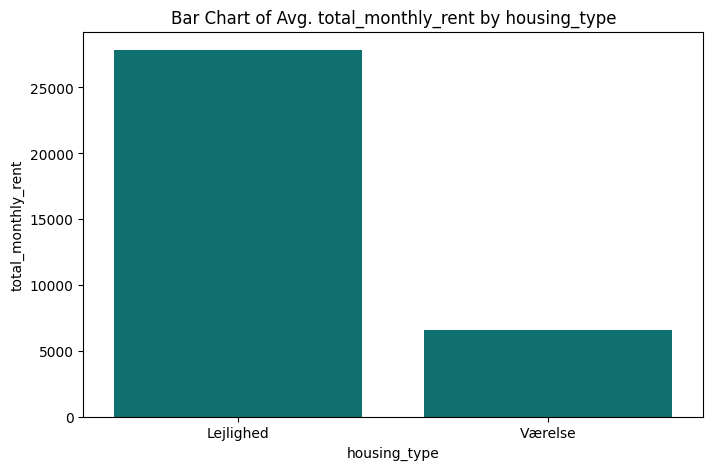

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


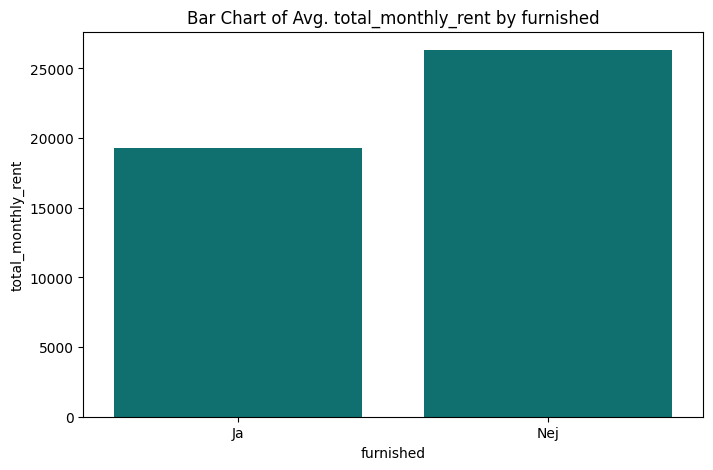

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


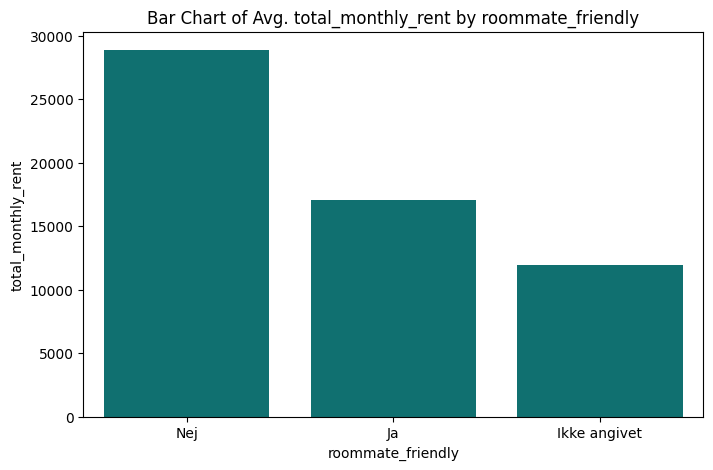

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


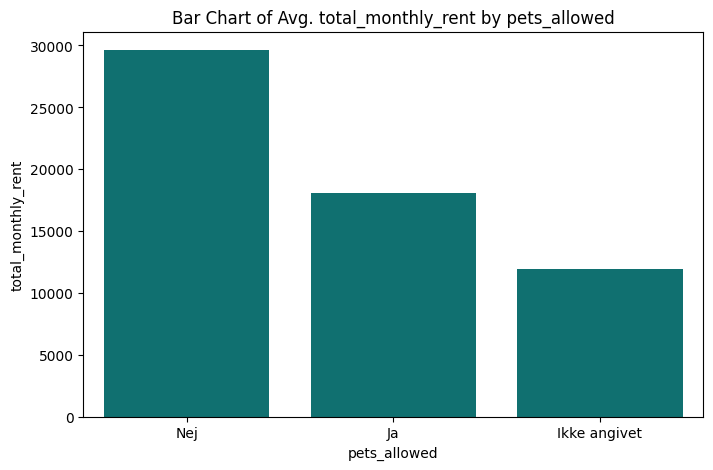

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


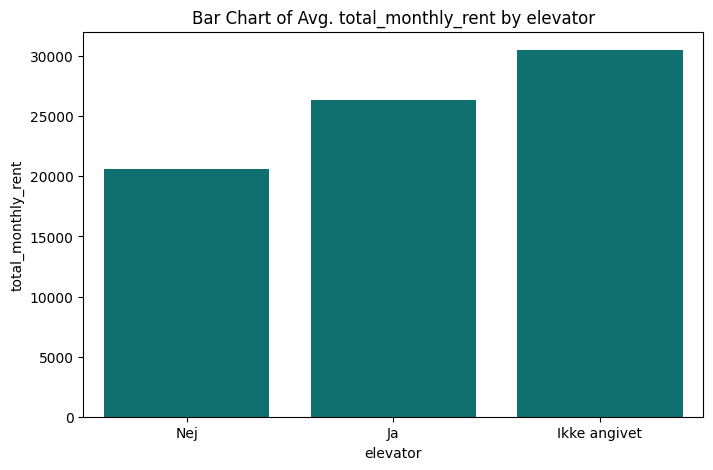

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


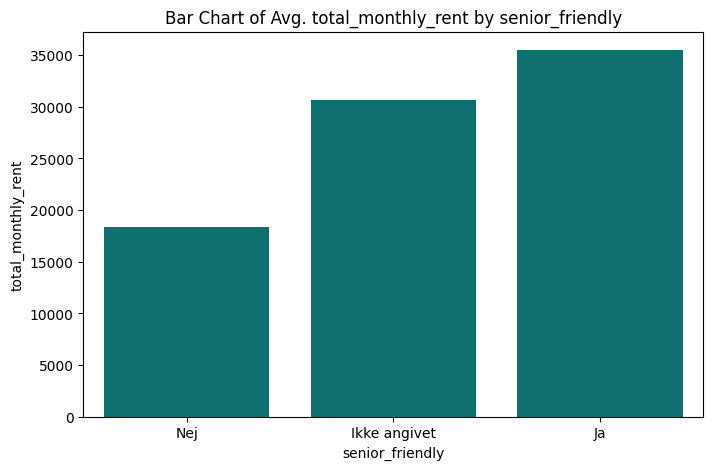

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


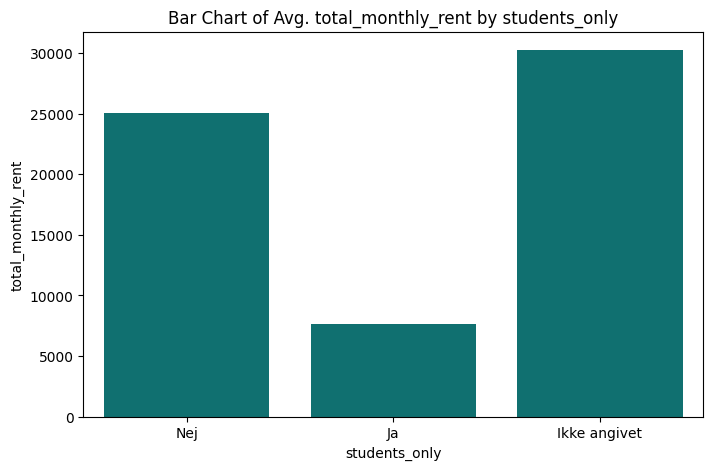

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


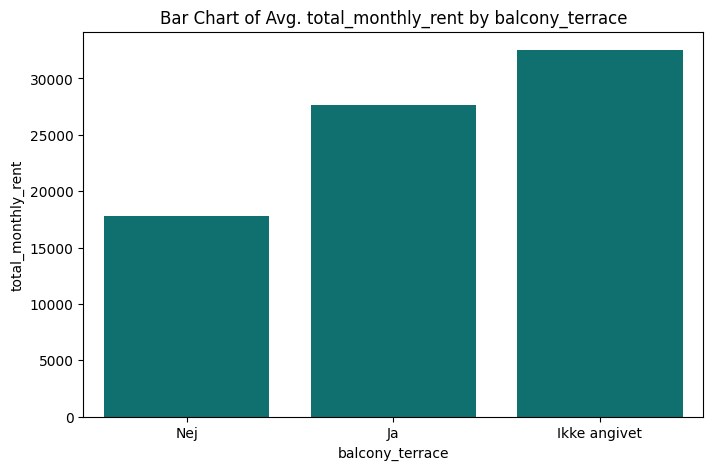

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


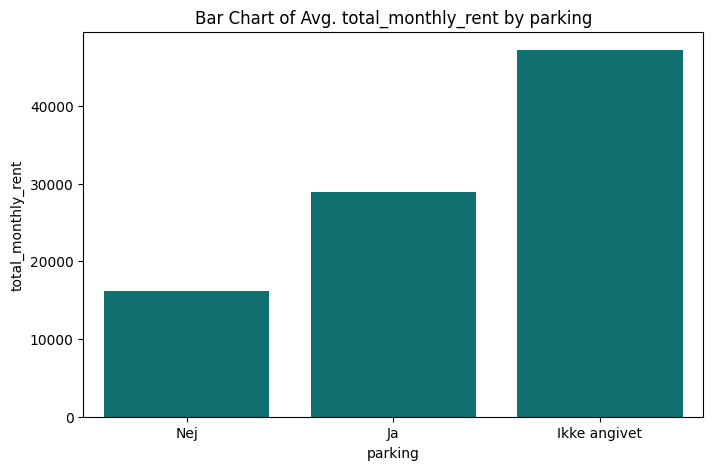

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


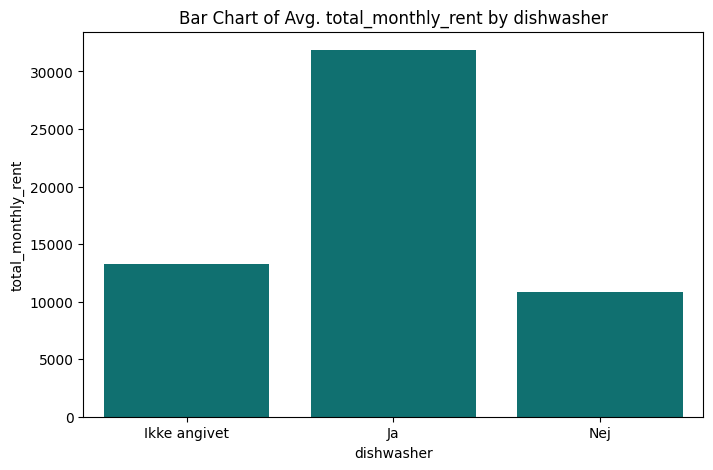

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


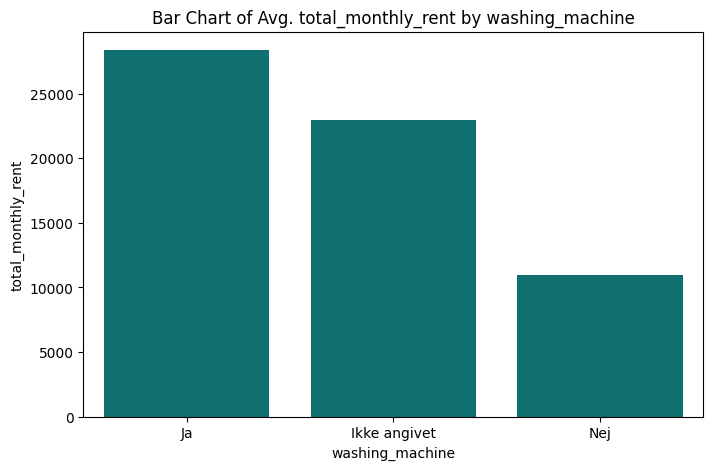

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


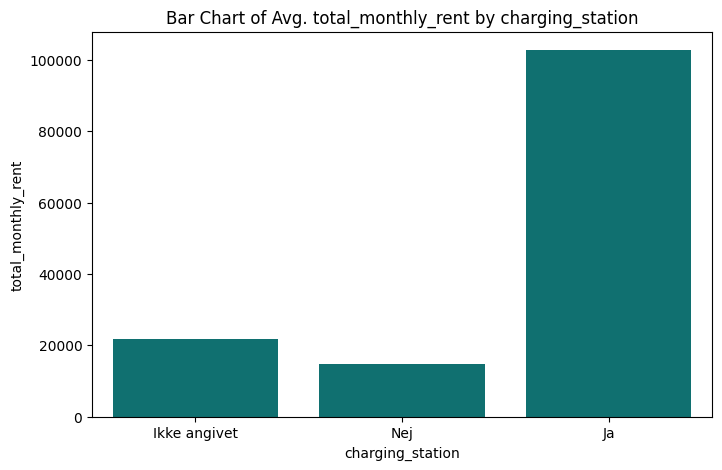

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


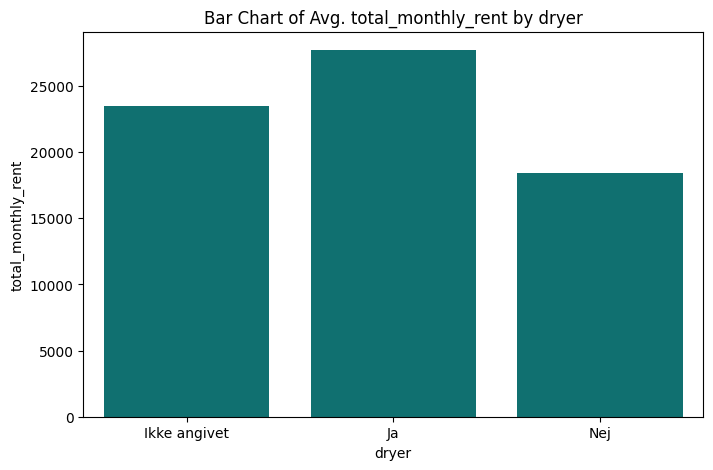

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


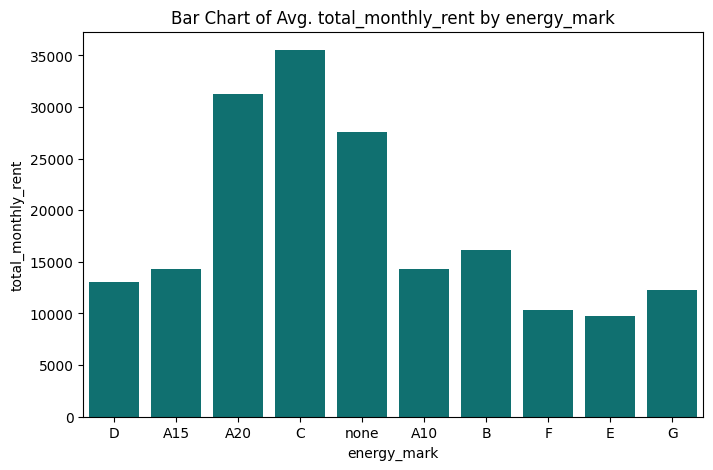

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


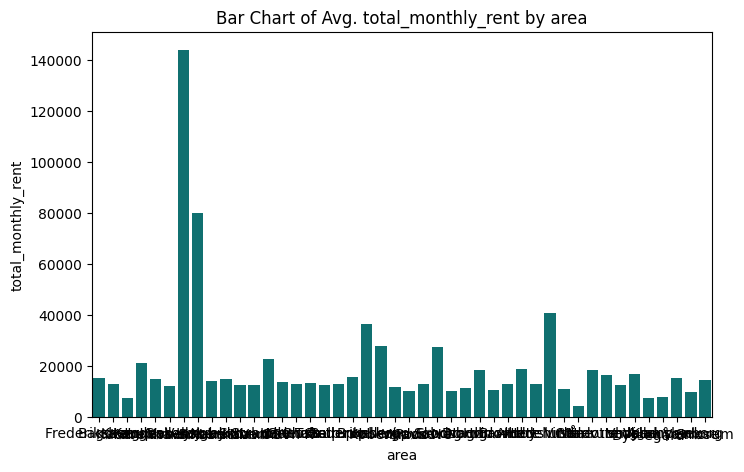

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


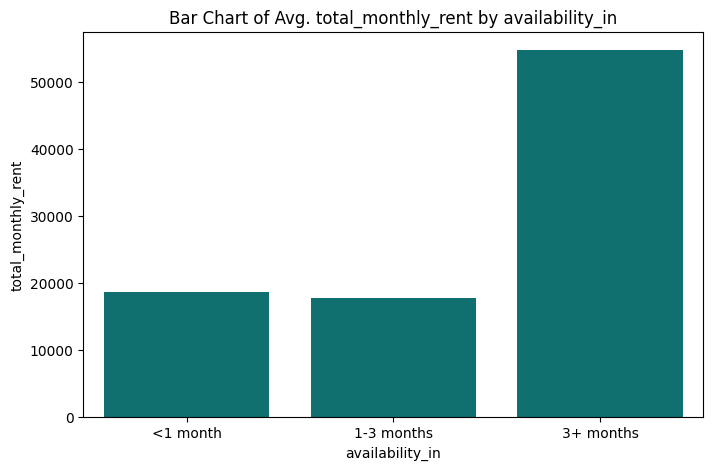

/var/folders/4f/7kcbgj992s5fhk7wcryyv4hc0000gn/T/ipykernel_25400/530847752.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')


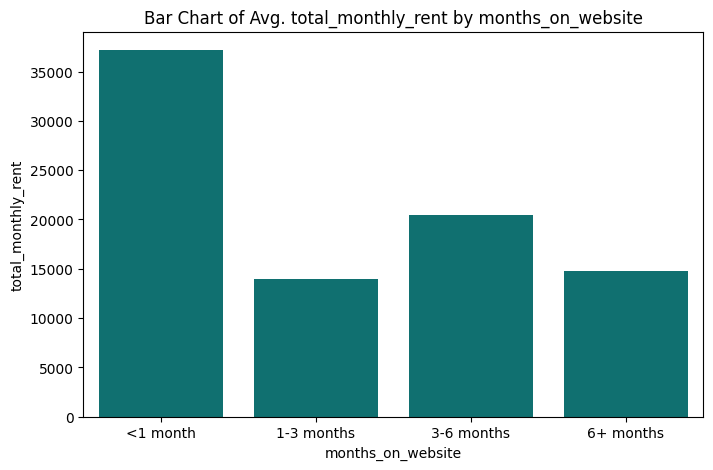

In [71]:
discrete_vars = df.select_dtypes(include=['object']).columns.tolist() 
continuous_var = 'total_monthly_rent' # We choose only the dependent variable we later want to predict


# Creating bar charts
for discrete_var in discrete_vars:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=discrete_var, y=continuous_var, data=df, ci=None, color='teal')
    plt.title(f'Bar Chart of Avg. {continuous_var} by {discrete_var}')
    plt.xlabel(discrete_var)
    plt.ylabel(continuous_var)
    plt.show()

In [72]:
df.head()

,monthly_rent,monthly_aconto,housing_type,size_sqm,rooms,floor,furnished,roommate_friendly,pets_allowed,elevator,...,charging_station,dryer,deposit,prepaid_rent,energy_mark,area,availability_in,days_on_website,total_monthly_rent,months_on_website
0,12850.0,1350.0,Lejlighed,86.0,3,3,Ja,Nej,Nej,Nej,...,Ikke angivet,Ikke angivet,38550.0,0.0,D,Frederiksberg C,<1 month,10.0,14200.0,<1 month
1,15700.0,1224.0,Lejlighed,113.0,4,4,Nej,Nej,Ja,Ja,...,Nej,Ja,47100.0,15700.0,A15,Bagsværd,1-3 months,10.0,16924.0,<1 month
2,5000.0,1000.0,Værelse,9.0,1,0,Ja,Ja,Nej,Nej,...,Ikke angivet,Ja,15000.0,0.0,A20,Kastrup,1-3 months,10.0,6000.0,<1 month
3,3500.0,500.0,Værelse,14.0,1,0,Ja,Ja,Nej,Nej,...,Nej,Ja,4000.0,3500.0,C,København S,1-3 months,10.0,4000.0,<1 month
4,4650.0,0.0,Værelse,7.0,1,4,Ja,Nej,Nej,Ja,...,Ikke angivet,Ikke angivet,9300.0,0.0,none,København V,<1 month,10.0,4650.0,<1 month


### Attempt with the log transformed variables

We were familiar with a technique to have more interpretable results, which is to transform the data with a function, in this case the log works for us, as the data has a long tail and contains outliers, so applying a log transformation to the variables helps normalize the distribution and make the histograms more interpretable.

In [73]:
for var in continuous_ratio_vars:
    if var!='size_sqm' and var!='days_on_website':
        df[f'{var}_log'] = np.log1p(df[var])

In [78]:
continuous_ratio_log_vars = [col for col in df.select_dtypes(include=['float64']).columns.tolist() if ('log' in col or col=='size_sqm' or col=='days_on_website')]

In [79]:
# 1. Quick Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       monthly_rent  monthly_aconto     size_sqm        rooms        floor  \
count  1.821000e+03     1821.000000  1821.000000  1821.000000  1821.000000   
mean   2.408824e+04      798.379462    74.945085     2.535969     2.322900   
std    1.244774e+05      491.094945    40.110661     1.211414     2.365519   
min    3.127000e+03        0.000000     6.000000     1.000000     0.000000   
25%    9.600000e+03      500.000000    42.000000     1.000000     1.000000   
50%    1.230000e+04      800.000000    79.000000     3.000000     2.000000   
75%    1.520000e+04     1000.000000    98.000000     3.000000     3.000000   
max    1.758802e+06     3099.000000   324.000000     8.000000    27.000000   

            deposit  prepaid_rent  days_on_website  total_monthly_rent  \
count  1.821000e+03  1.821000e+03      1821.000000        1.821000e+03   
mean   6.311357e+04  2.343146e+04        64.157057        2.488662e+04   
std    3.382125e+05  1.403508e+05        94.682967     

In [80]:
# 2. Correlation Matrix for the numerical variables
correlation_matrix = df[continuous_ratio_log_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        size_sqm  days_on_website  monthly_rent_log  \
size_sqm                1.000000        -0.023001          0.681720   
days_on_website        -0.023001         1.000000         -0.039113   
monthly_rent_log        0.681720        -0.039113          1.000000   
monthly_aconto_log      0.472508        -0.094528          0.357157   
deposit_log             0.537866        -0.081003          0.660118   
prepaid_rent_log        0.246322        -0.129843          0.251044   
total_monthly_rent_log  0.691646        -0.042178          0.998428   

                        monthly_aconto_log  deposit_log  prepaid_rent_log  \
size_sqm                          0.472508     0.537866          0.246322   
days_on_website                  -0.094528    -0.081003         -0.129843   
monthly_rent_log                  0.357157     0.660118          0.251044   
monthly_aconto_log                1.000000     0.494861          0.360972   
deposit_log              

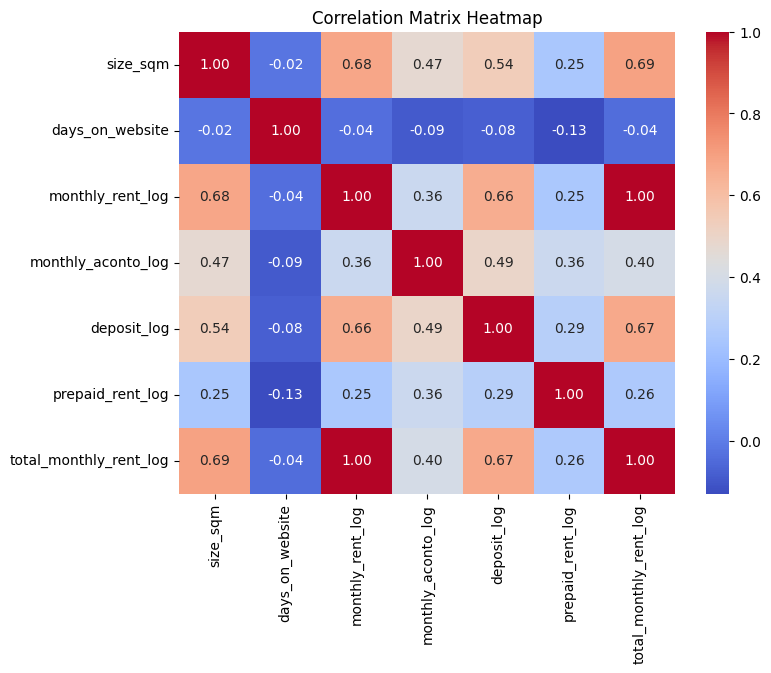

In [81]:
# 3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

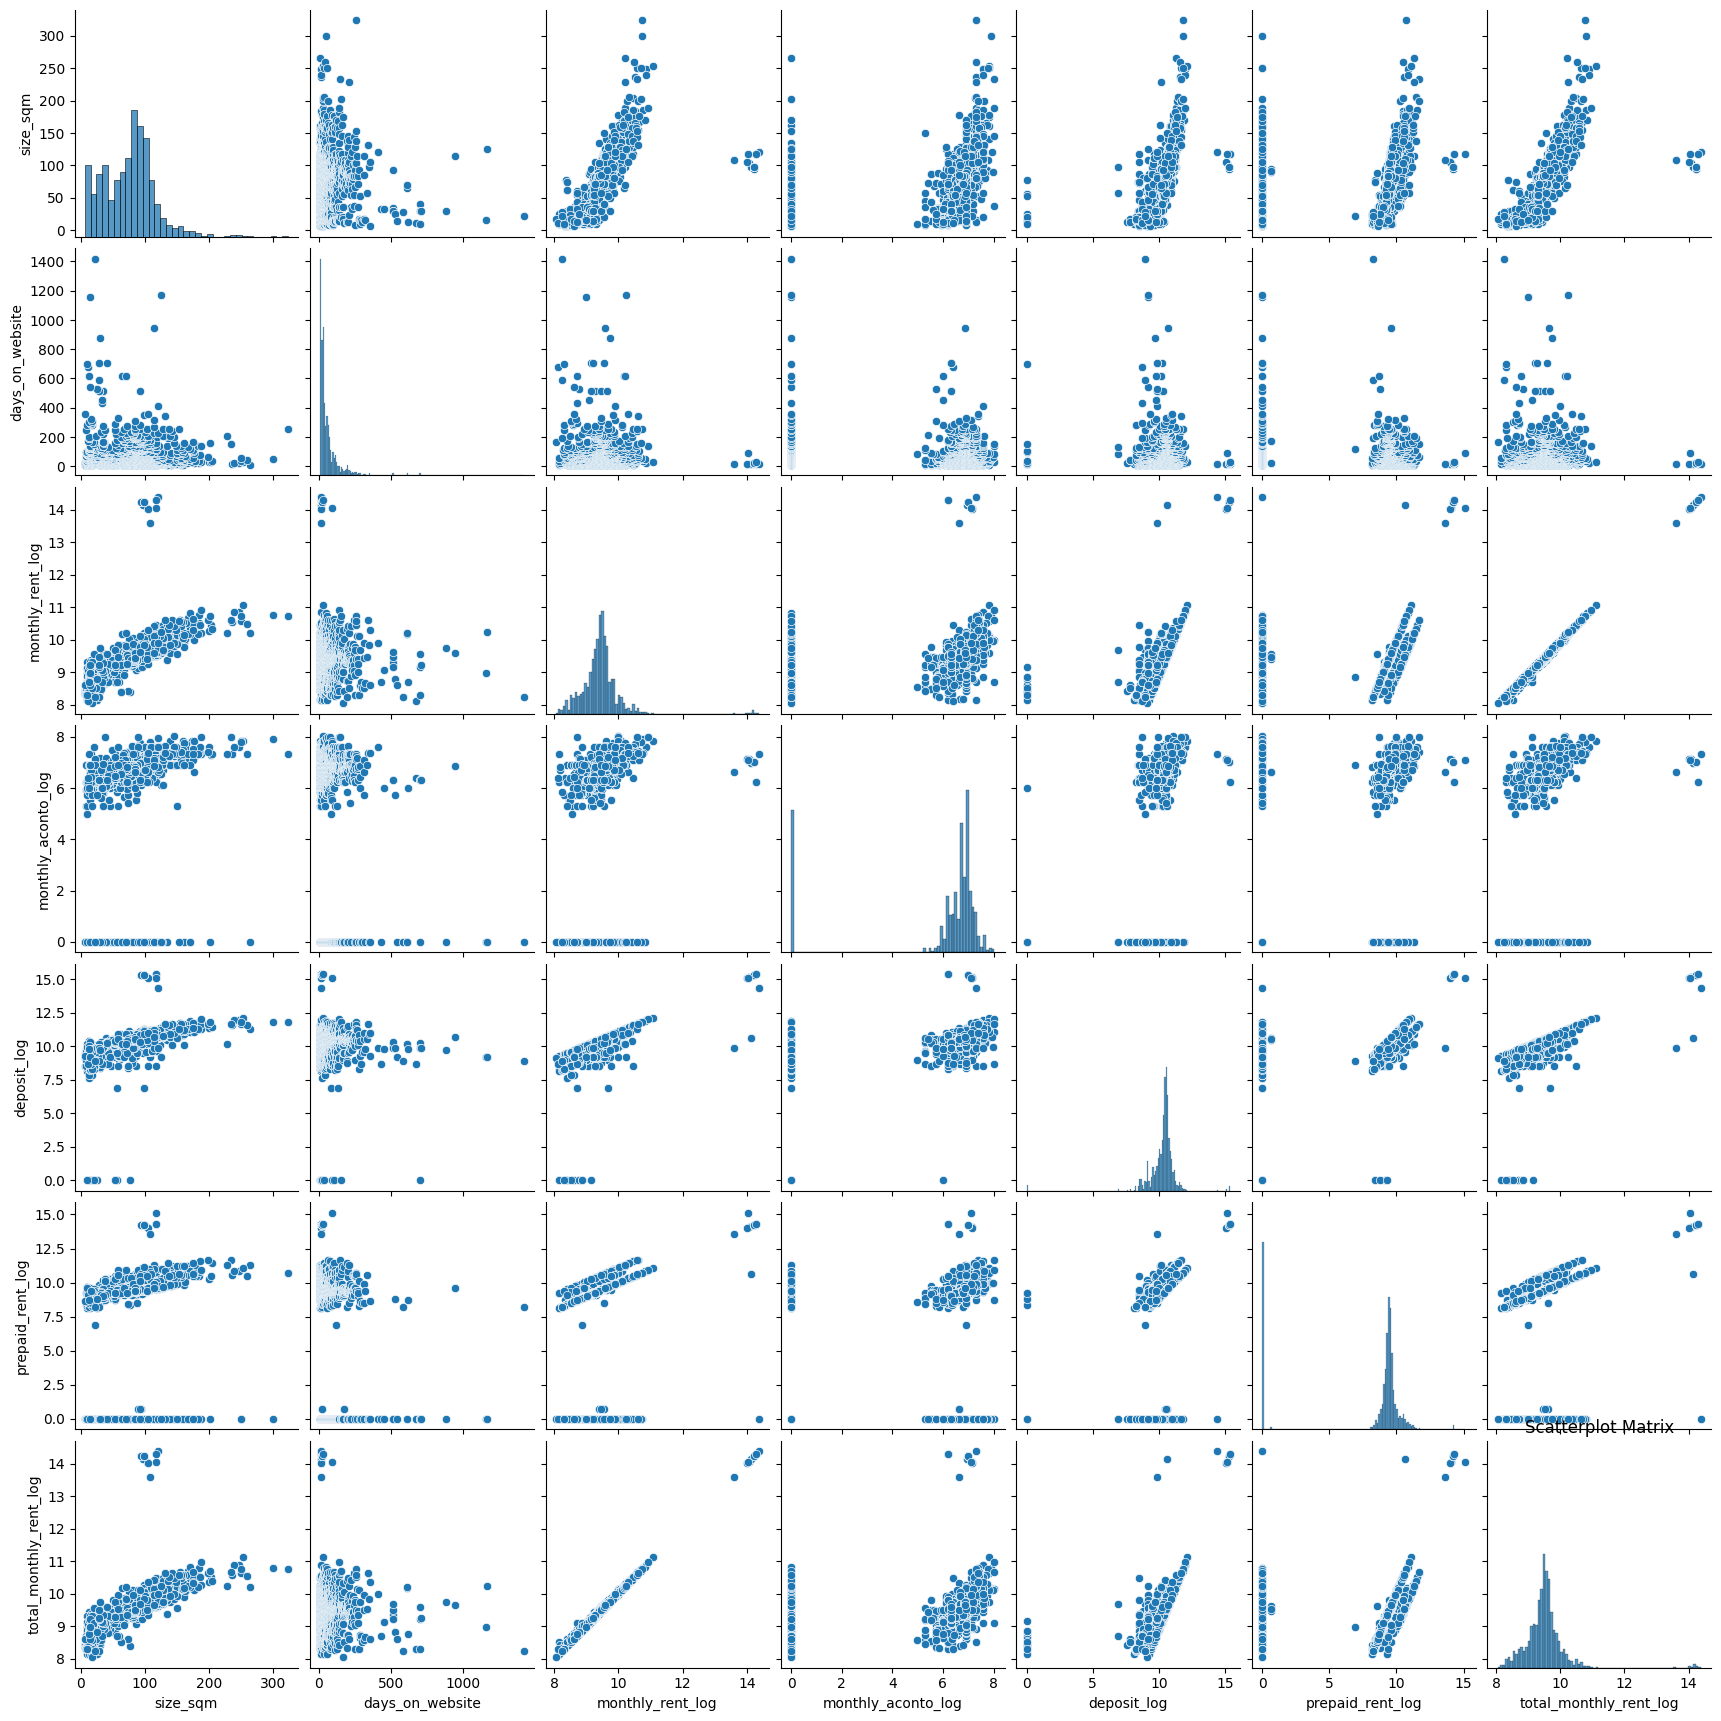

In [82]:
# 4. Scatterplot Matrix with Histograms (only continuous ratio variables)
sns.pairplot(df[continuous_ratio_log_vars])
plt.title('Scatterplot Matrix')
plt.show()

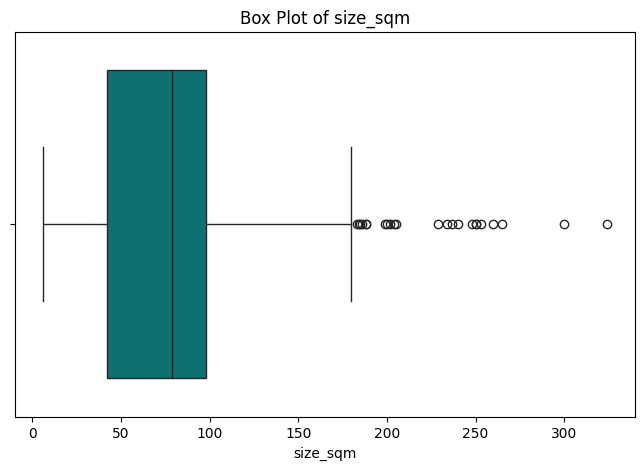

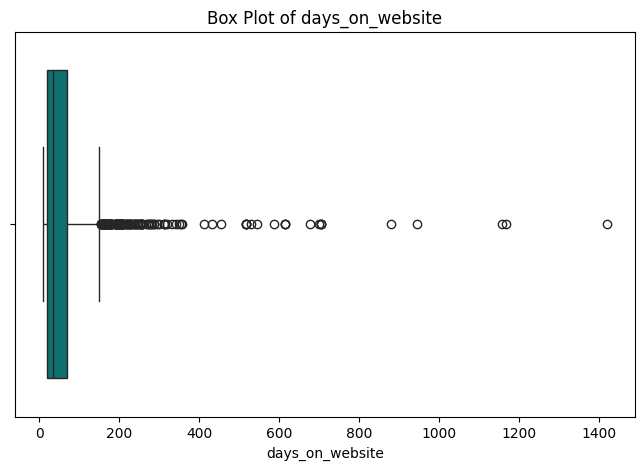

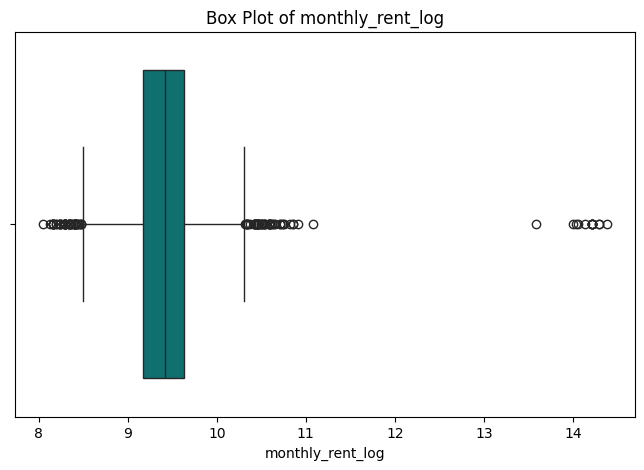

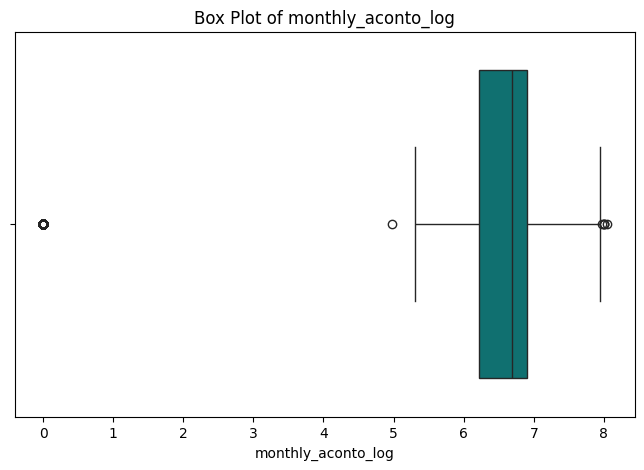

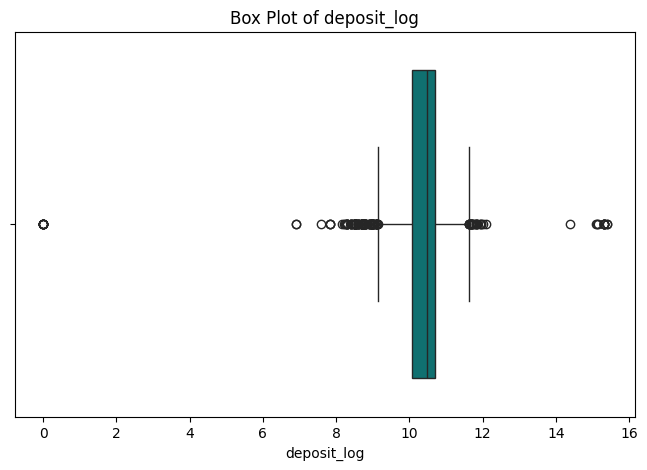

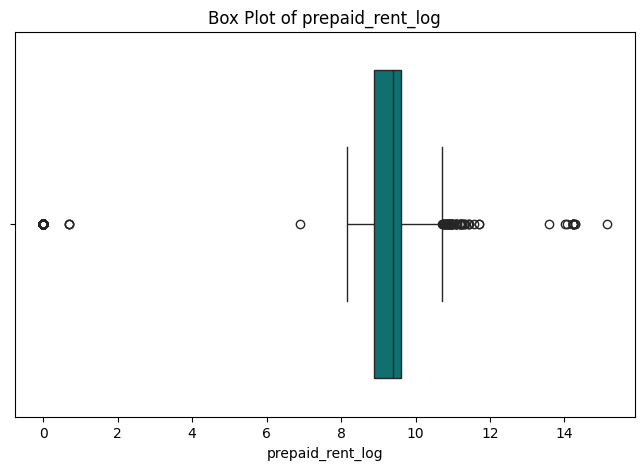

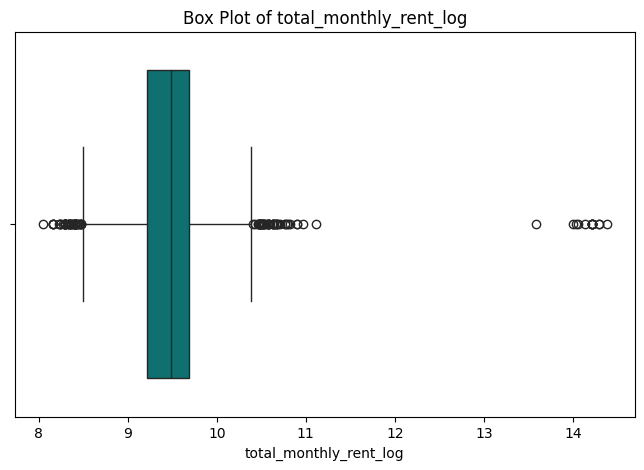

In [83]:
for var in continuous_ratio_log_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[var], color='teal')
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

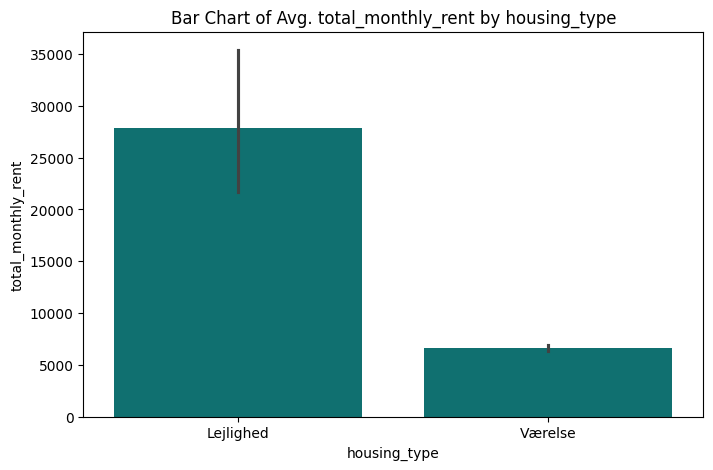

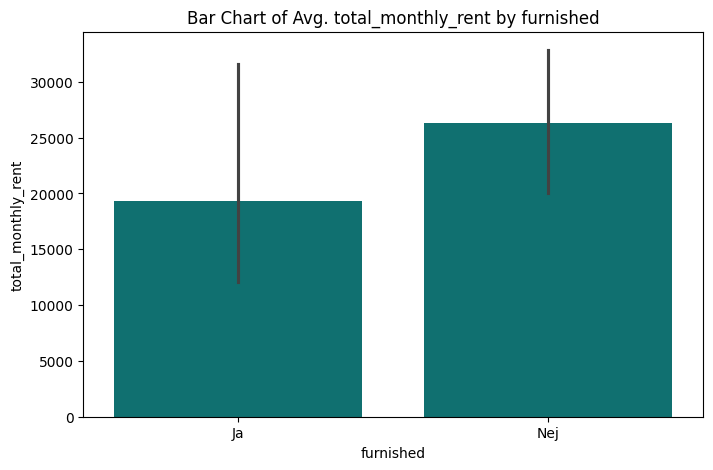

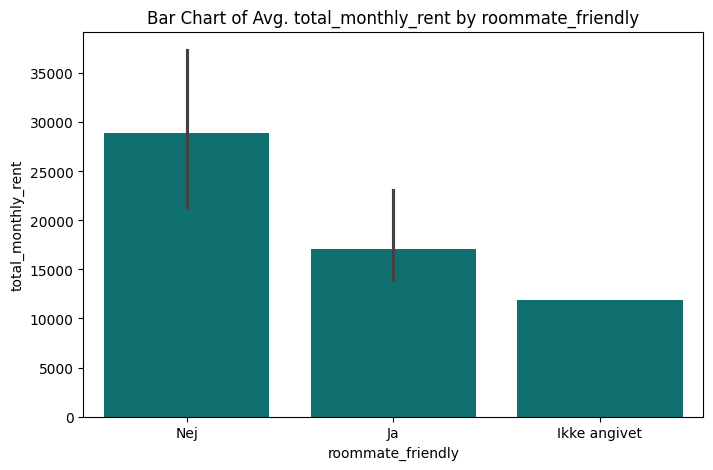

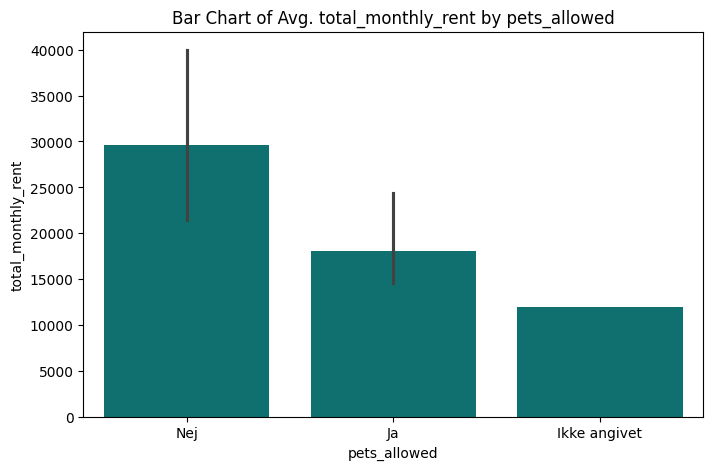

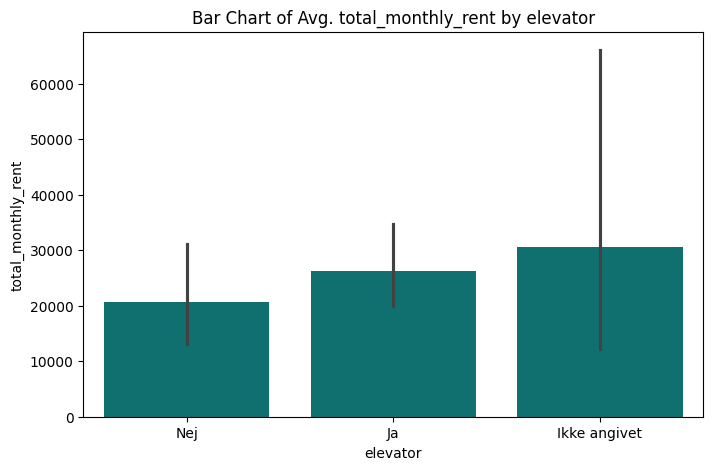

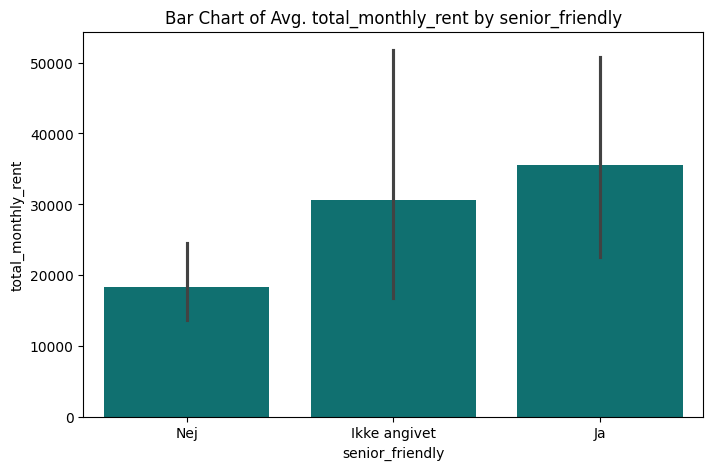

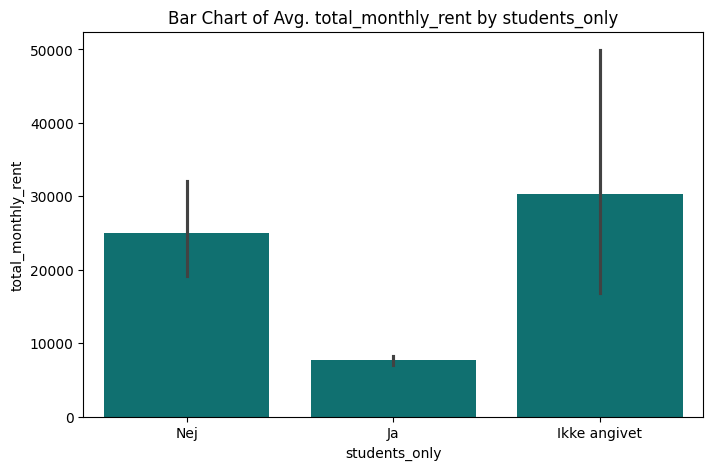

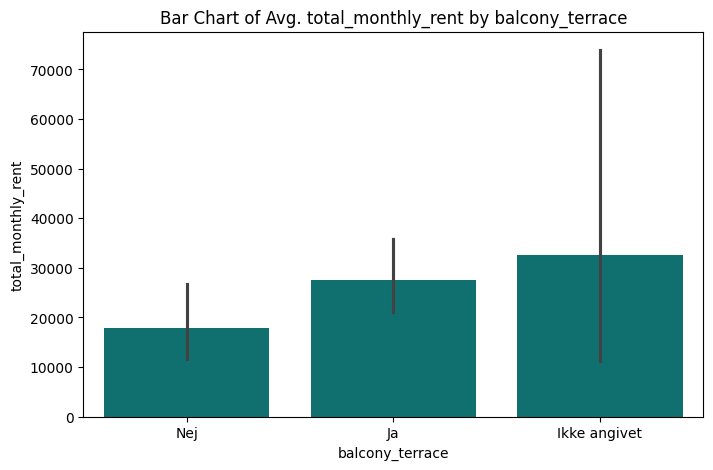

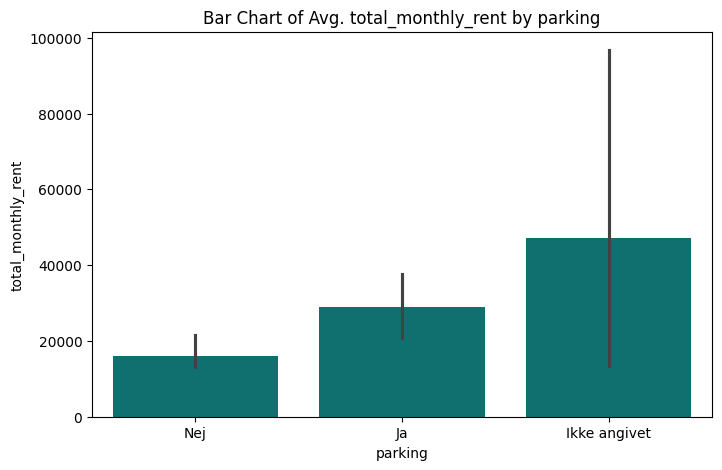

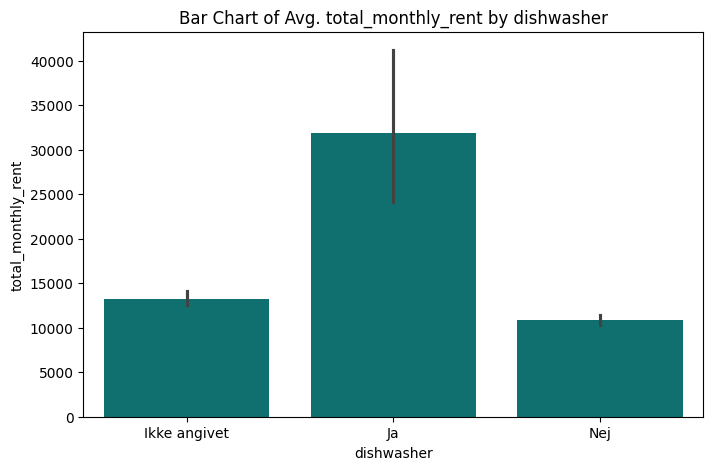

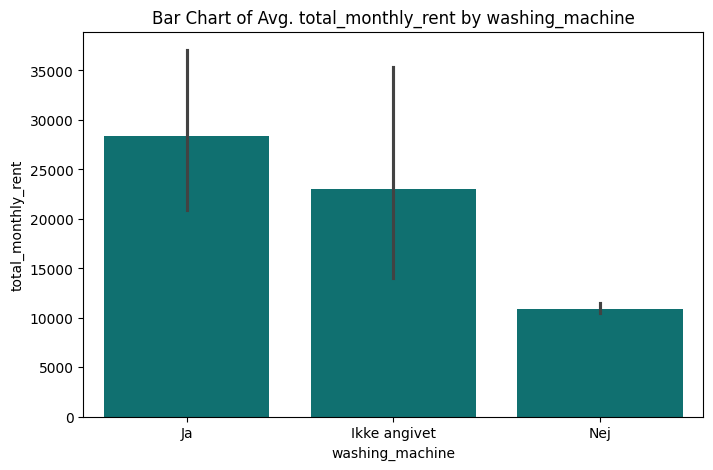

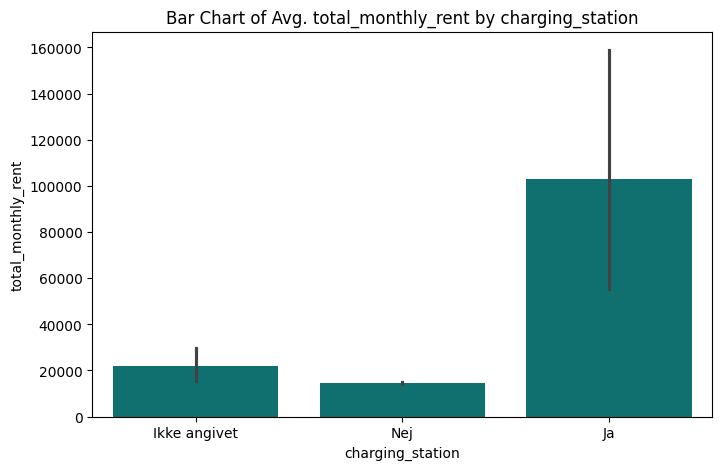

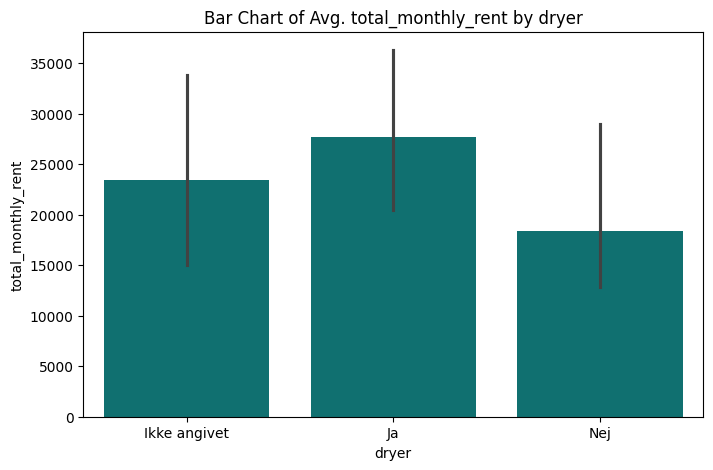

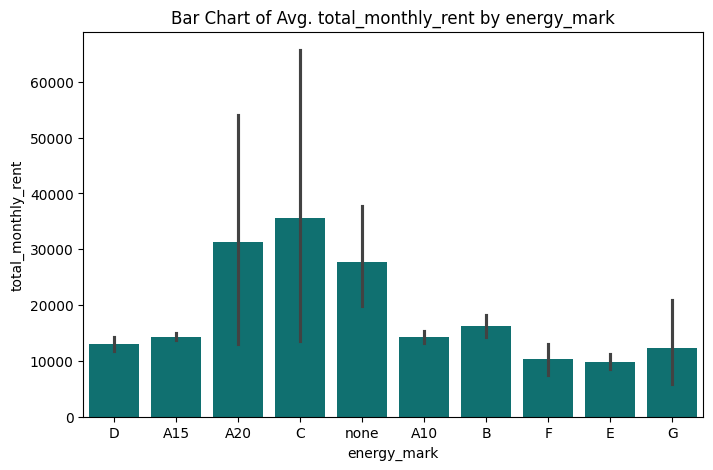

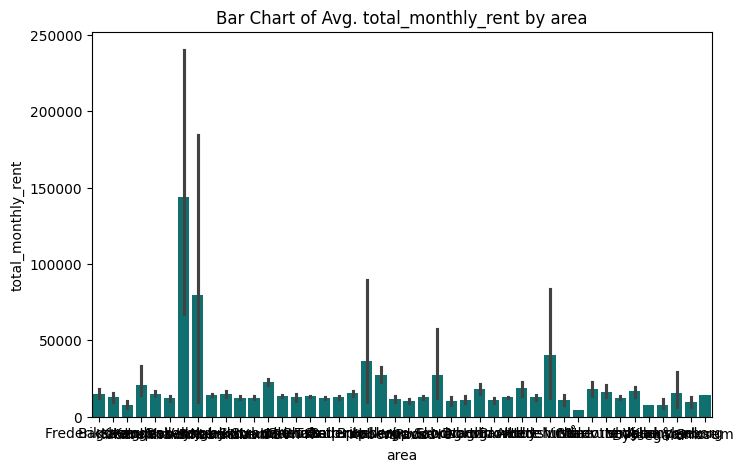

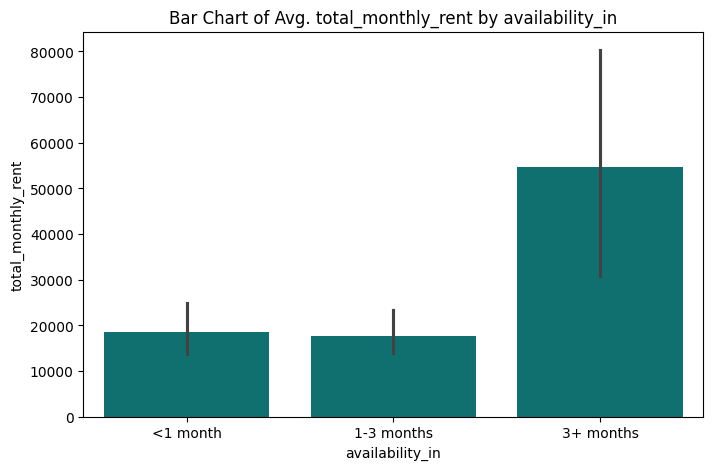

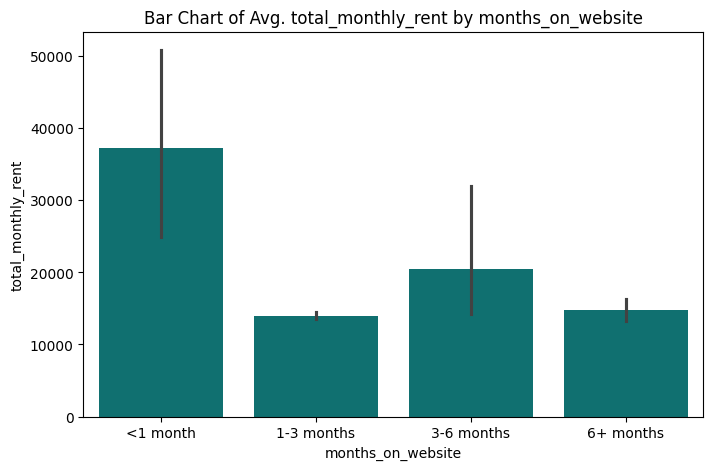

In [84]:
# 5. Bar charts of continuous variables by discrete variables
discrete_vars = df.select_dtypes(include=['object']).columns.tolist() 
continuous_var = 'total_monthly_rent' # We choose only the dependent variable we later want to predict

# Creating bar charts
for discrete_var in discrete_vars:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=discrete_var, y=continuous_var, data=df, color='teal')
    plt.title(f'Bar Chart of Avg. {continuous_var} by {discrete_var}')
    plt.xlabel(discrete_var)
    plt.ylabel(continuous_var)
    plt.show()

In [86]:
df1 = df.drop(columns=[col for col in continuous_ratio_vars if (col!='size_sqm' and col!='days_on_website')])

In [87]:
df1.to_csv('preprocessed_log_data.csv', index=False, header=True, encoding='utf-8')